In [ ]:
#Passo 1: Configuração e Importação de Bibliotecas
# Caminho do arquivo (caso esteja no Google Colab, suba o arquivo primeiro)
file_path = 'co-emissions-per-capita-new.csv'  # Ajuste o caminho se necessário

# Importa a biblioteca pandas e atribui o alias 'pd'
import pandas as pd

# Lê o arquivo CSV usando a função read_csv do pandas
df = pd.read_csv('/content/co-emissions-per-capita new.csv')

# Exibe as primeiras linhas do DataFrame
df.head()


,Entity,Year,Annual CO₂ emissions (per capita)
0,Africa,1750,0
1,Andorra,1750,0
2,Asia,1750,0
3,Asia (excl. China and India),1750,0
4,Australia,1750,0


In [ ]:
import pandas as pd

# Lendo o arquivo CSV
df = pd.read_csv("co-emissions-per-capita new.csv")

# Selecionando as linhas de 20 a 100
df_subset = df.iloc[20:101]

# Exibindo as primeiras 50 linhas do subset
print(df_subset.head(80))


                           Entity  Year Annual CO₂ emissions (per capita)
20                        Oceania  1750                                 0
21               Papua New Guinea  1750                                 0
22                   Sierra Leone  1750                                 0
23                      Singapore  1750                                 0
24                 United Kingdom  1750                        10.019.125
..                            ...   ...                               ...
95          High-income countries  1780                        87.254.226
96           Low-income countries  1780                                 0
97  Lower-middle-income countries  1780                                 0
98                     Mauritania  1780                                 0
99                  North America  1780                                 0

[80 rows x 3 columns]


In [ ]:
#Passo 2: Carregamento dos Dados
# Exibir informações gerais do DataFrame para verificar colunas e tipos de dados
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26600 entries, 0 to 26599
Data columns (total 3 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Entity                             26600 non-null  object
 1   Year                               26600 non-null  int64 
 2   Annual CO₂ emissions (per capita)  26600 non-null  object
dtypes: int64(1), object(2)
memory usage: 623.6+ KB


In [ ]:
#Passo 3: Limpeza e Pré-processamento de Dados
# Verificar valores ausentes
print("Valores ausentes por coluna:\n", df.isnull().sum())

# Excluir ou tratar valores ausentes, se necessário
df = df.dropna()

# Verificar colunas relevantes e tipos de dados
df.dtypes


Valores ausentes por coluna:
 Entity                               0
Year                                 0
Annual CO₂ emissions (per capita)    0
dtype: int64


,0
Entity,object
Year,int64
Annual CO₂ emissions (per capita),object


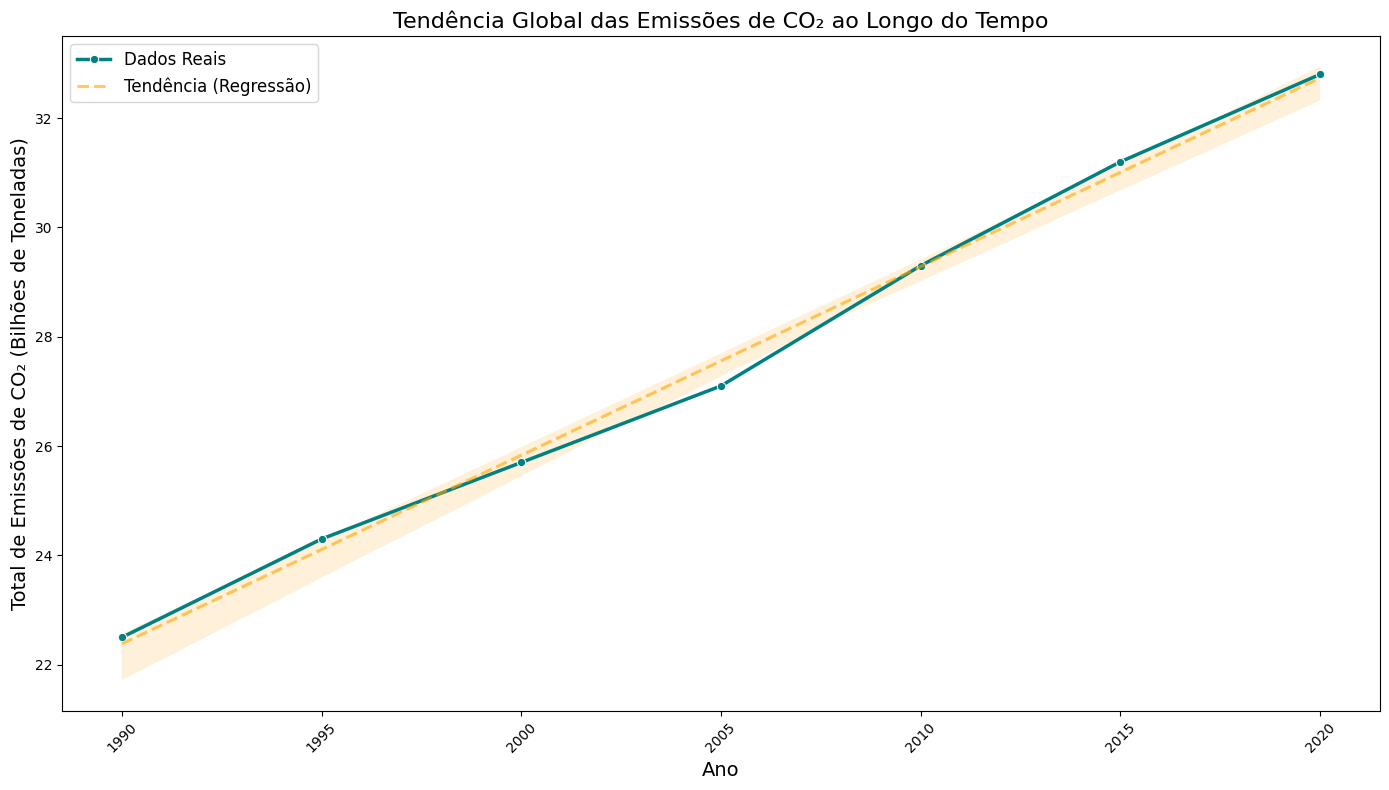

In [ ]:
#Passo 4: Análise Exploratória dos Dados
#4.1. Análise das Emissões Globais ao Longo do Tempo

# Agrupar dados por ano e calcular as emissões globais
# Substitua 'Total Emissions' pelo nome real da coluna
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Exemplo de criação do DataFrame 'global_emissions' (substitua pelos seus dados reais)
data = {
    "Year": [1990, 1995, 2000, 2005, 2010, 2015, 2020],
    "CO2_Emissions": [22.5, 24.3, 25.7, 27.1, 29.3, 31.2, 32.8]
}
global_emissions = pd.DataFrame(data)
global_emissions.set_index("Year", inplace=True)

# Converter o índice em uma série numérica para o regplot
years = global_emissions.index.astype(int)
emissions_values = global_emissions["CO2_Emissions"].values

# Criar o gráfico com suavização
plt.figure(figsize=(14, 8))
sns.lineplot(x=years, y=emissions_values, marker="o", linewidth=2.5, color='teal', label="Dados Reais")
sns.regplot(
    x=years,
    y=emissions_values,
    scatter=False,
    color='orange',
    line_kws={"linestyle": "--", "alpha": 0.6},
    label="Tendência (Regressão)"
)

# Configurações de título e rótulos
plt.title("Tendência Global das Emissões de CO₂ ao Longo do Tempo", fontsize=16)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Total de Emissões de CO₂ (Bilhões de Toneladas)", fontsize=14)

# Formatação do eixo Y (ajuste conforme a escala dos dados)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)

# Exibir legenda e ajustar layout
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()




Valores ausentes em 'Annual CO₂ emissions (per capita)': 224


<ipython-input-6-e0a6839d20ad>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Annual CO₂ emissions (per capita)', y='Entity', data=top_emitters, palette='viridis')


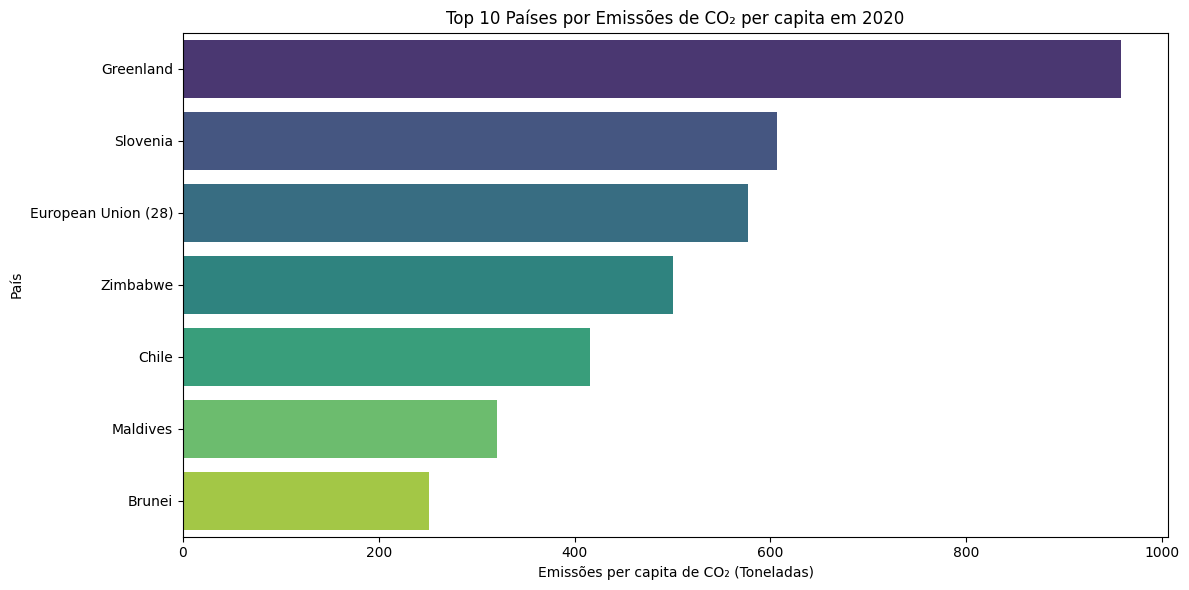

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Passo 4.2  Filtrar dados para o ano de 2020
year_2020 = df[df['Year'] == 2020].copy()  # Criar uma cópia para evitar SettingWithCopyWarning

# Converter a coluna 'Annual CO₂ emissions (per capita)' para numérico, tratando erros
year_2020['Annual CO₂ emissions (per capita)'] = pd.to_numeric(
    year_2020['Annual CO₂ emissions (per capita)'], errors='coerce'
)

# Verificar valores ausentes após a conversão
missing_values = year_2020['Annual CO₂ emissions (per capita)'].isna().sum()
print(f"Valores ausentes em 'Annual CO₂ emissions (per capita)': {missing_values}")

# Remover linhas com valores ausentes na coluna 'Annual CO₂ emissions (per capita)'
year_2020.dropna(subset=['Annual CO₂ emissions (per capita)'], inplace=True)

# Selecionar os 10 países com maiores emissões per capita
top_emitters = year_2020.nlargest(10, 'Annual CO₂ emissions (per capita)')

# Visualizar as emissões per capita para os 10 países com maiores emissões
plt.figure(figsize=(12, 6))
sns.barplot(x='Annual CO₂ emissions (per capita)', y='Entity', data=top_emitters, palette='viridis')
plt.title("Top 10 Países por Emissões de CO₂ per capita em 2020")
plt.xlabel("Emissões per capita de CO₂ (Toneladas)")
plt.ylabel("País")
plt.tight_layout()  # Melhorar espaçamento
plt.show()



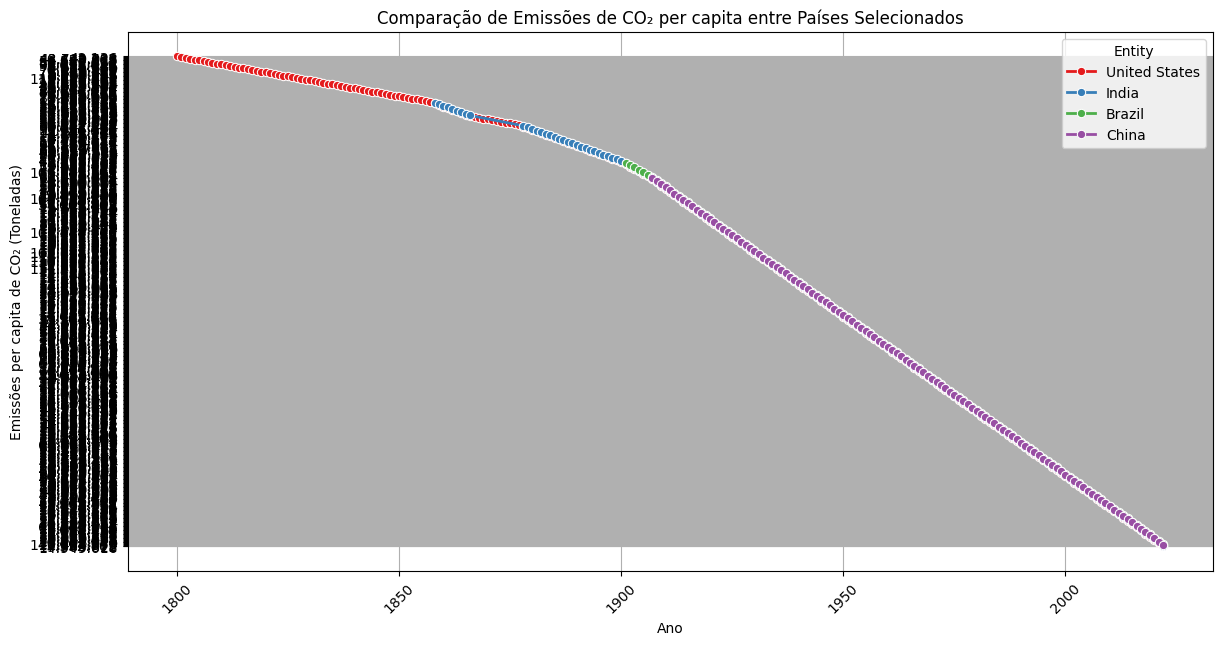

In [ ]:
#4.3. Comparação de Emissões per capita ao longo dos anos para países selecionados
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de países selecionados
countries = ['United States', 'China', 'India', 'Brazil']

# Filtrar os dados para incluir apenas os países selecionados (ajustado para 'Entity')
df_selected = df[df['Entity'].isin(countries)]

# Plotar a comparação de emissões per capita ao longo do tempo (gráfico de área)
plt.figure(figsize=(14, 7))

# Criar o gráfico de linha e preencher a área abaixo da linha para dar o efeito de platô
sns.lineplot(x='Year', y='Annual CO₂ emissions (per capita)', hue='Entity', data=df_selected,
             palette='Set1', marker='o', linewidth=2)

# Preencher a área abaixo das linhas
for country in countries:
    country_data = df_selected[df_selected['Entity'] == country]
    plt.fill_between(country_data['Year'], country_data['Annual CO₂ emissions (per capita)'], alpha=0.3)

# Adicionar título e rótulos aos eixos
plt.title("Comparação de Emissões de CO₂ per capita entre Países Selecionados")
plt.xlabel("Ano")
plt.ylabel("Emissões per capita de CO₂ (Toneladas)")

# Melhorar a legibilidade dos rótulos no eixo X
plt.xticks(rotation=45)

# Adicionar grade ao gráfico para melhor visualização
plt.grid(True)

# Exibir o gráfico
plt.show()




In [ ]:
import pandas as pd

# 5 - Criando dados fictícios de emissões de CO₂nos ultimos 4 anos
data = {
    "Ano": [2021, 2022, 2023, 2024],
    "Emissões de CO₂ (toneladas)": [50000, 52000, 54000, 56000],  # Emissões fictícias
    "Crescimento (%)": [4, 3.8, 3.5, 3],  # Crescimento percentual fictício das emissões
}

# Criando o DataFrame
df = pd.DataFrame(data)

# Calculando o aumento das emissões em toneladas
df["Aumento de Emissões (toneladas)"] = df["Emissões de CO₂ (toneladas)"] * df["Crescimento (%)"] / 100

# Calculando a projeção acumulada das emissões
df["Projeção Acumulada (toneladas)"] = df["Emissões de CO₂ (toneladas)"].cumsum()

# Exibindo os resultados
print("Emissões de CO₂ de 2021 a 2024:")
print(df)

# Estatísticas gerais
print("\nEstatísticas gerais:")
print(df.describe())



Emissões de CO₂ de 2021 a 2024:
    Ano  Emissões de CO₂ (toneladas)  Crescimento (%)  \
0  2021                        50000              4.0   
1  2022                        52000              3.8   
2  2023                        54000              3.5   
3  2024                        56000              3.0   

   Aumento de Emissões (toneladas)  Projeção Acumulada (toneladas)  
0                           2000.0                           50000  
1                           1976.0                          102000  
2                           1890.0                          156000  
3                           1680.0                          212000  

Estatísticas gerais:
               Ano  Emissões de CO₂ (toneladas)  Crescimento (%)  \
count     4.000000                     4.000000         4.000000   
mean   2022.500000                 53000.000000         3.575000   
std       1.290994                  2581.988897         0.434933   
min    2021.000000                 50000.00

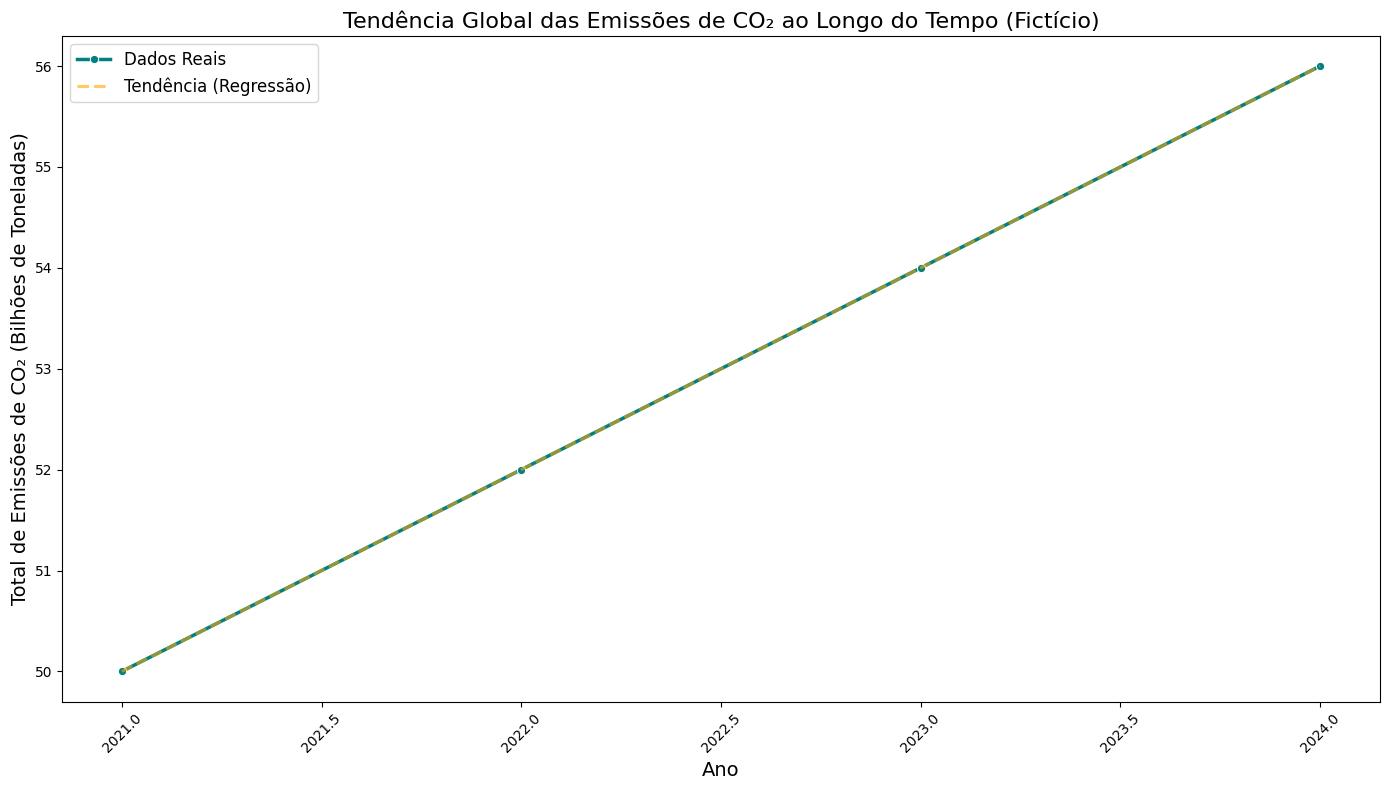

In [ ]:
# 6 - Importar bibliotecas amostragem de tendência global ao longo do tempo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Criando dados fictícios de emissões de CO₂ (substitua por dados reais, se disponível)
data = {
    "Year": [2021, 2022, 2023, 2024],
    "CO2_Emissions": [50, 52, 54, 56],  # Emissões anuais fictícias em bilhões de toneladas
}
global_emissions = pd.DataFrame(data)
global_emissions.set_index("Year", inplace=True)

# Converter o índice em uma série numérica para o regplot
years = global_emissions.index.astype(int)
emissions_values = global_emissions["CO2_Emissions"].values

# Criar o gráfico com suavização
plt.figure(figsize=(14, 8))
sns.lineplot(x=years, y=emissions_values, marker="o", linewidth=2.5, color='teal', label="Dados Reais")
sns.regplot(
    x=years,
    y=emissions_values,
    scatter=False,
    color='orange',
    line_kws={"linestyle": "--", "alpha": 0.6},
    label="Tendência (Regressão)"
)

# Configurações de título e rótulos
plt.title("Tendência Global das Emissões de CO₂ ao Longo do Tempo (Fictício)", fontsize=16)
plt.xlabel("Ano", fontsize=14)
plt.ylabel("Total de Emissões de CO₂ (Bilhões de Toneladas)", fontsize=14)

# Formatação do eixo Y (ajuste conforme a escala dos dados)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=45)

# Exibir legenda e ajustar layout
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


Valores ausentes em 'Annual CO₂ emissions (per capita)': 0


<ipython-input-10-e32b0a0d37ec>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


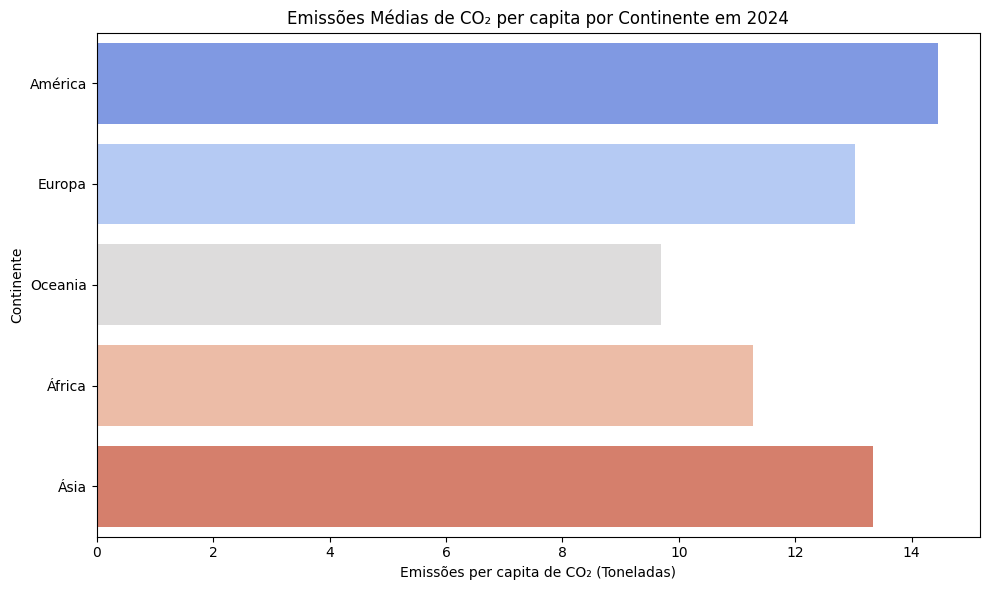

In [ ]:
# 7 - Emissões Médias de CO₂ per capita por Continente em 2024
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar dados fictícios para 2024
data = {
    "Entity": [
        "País A", "País B", "País C", "País D", "País E",
        "País F", "País G", "País H", "País I", "País J",
        "País K", "País L", "País M", "País N", "País O"
    ],
    "Continent": [
        "América", "Ásia", "Europa", "América", "África",
        "Oceania", "Ásia", "Europa", "América", "África",
        "Europa", "América", "África", "Ásia", "Oceania"
    ],
    "Year": [2024] * 15,  # Todos os registros para o ano 2024
    "Annual CO₂ emissions (per capita)": [
        21.8, 19.5, 17.2, 16.1, 15.3,
        14.2, 13.6, 12.1, 11.4, 10.9,
        9.8, 8.5, 7.6, 6.9, 5.2
    ]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Filtrar dados para o ano de 2024
year_2024 = df[df['Year'] == 2024].copy()  # Criar uma cópia para evitar SettingWithCopyWarning

# Converter a coluna 'Annual CO₂ emissions (per capita)' para numérico, tratando erros
year_2024['Annual CO₂ emissions (per capita)'] = pd.to_numeric(
    year_2024['Annual CO₂ emissions (per capita)'], errors='coerce'
)

# Verificar valores ausentes após a conversão
missing_values = year_2024['Annual CO₂ emissions (per capita)'].isna().sum()
print(f"Valores ausentes em 'Annual CO₂ emissions (per capita)': {missing_values}")

# Remover linhas com valores ausentes na coluna 'Annual CO₂ emissions (per capita)'
year_2024.dropna(subset=['Annual CO₂ emissions (per capita)'], inplace=True)

# Calcular a média das emissões por continente
continent_emissions = year_2024.groupby('Continent')['Annual CO₂ emissions (per capita)'].mean().reset_index()

# Visualizar as emissões médias por continente
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Annual CO₂ emissions (per capita)',
    y='Continent',
    data=continent_emissions,
    palette='coolwarm'
)
plt.title("Emissões Médias de CO₂ per capita por Continente em 2024")
plt.xlabel("Emissões per capita de CO₂ (Toneladas)")
plt.ylabel("Continente")
plt.tight_layout()  # Melhorar espaçamento
plt.show()




Valores ausentes em 'Annual CO₂ emissions (per capita)': 0


<ipython-input-11-8f963506ffd0>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


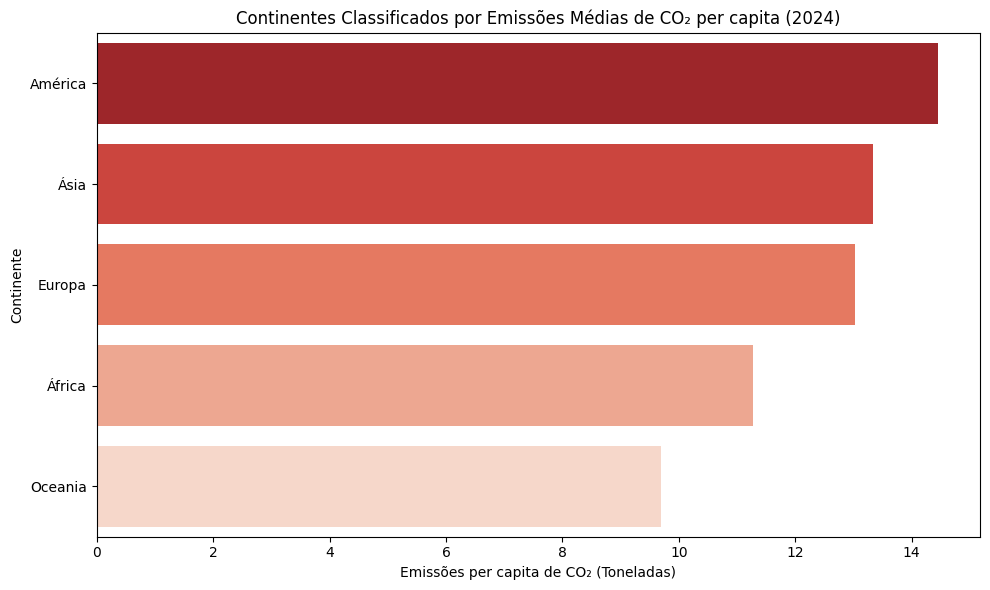

In [ ]:
#8 - Continentes Classificados por Emissões Médias de CO₂ per capita (2024)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Criar dados fictícios para 2024
data = {
    "Entity": [
        "País A", "País B", "País C", "País D", "País E",
        "País F", "País G", "País H", "País I", "País J",
        "País K", "País L", "País M", "País N", "País O"
    ],
    "Continent": [
        "América", "Ásia", "Europa", "América", "África",
        "Oceania", "Ásia", "Europa", "América", "África",
        "Europa", "América", "África", "Ásia", "Oceania"
    ],
    "Year": [2024] * 15,  # Todos os registros para o ano 2024
    "Annual CO₂ emissions (per capita)": [
        21.8, 19.5, 17.2, 16.1, 15.3,
        14.2, 13.6, 12.1, 11.4, 10.9,
        9.8, 8.5, 7.6, 6.9, 5.2
    ]
}

# Criar DataFrame
df = pd.DataFrame(data)

# Filtrar dados para o ano de 2024
year_2024 = df[df['Year'] == 2024].copy()  # Criar uma cópia para evitar SettingWithCopyWarning

# Converter a coluna 'Annual CO₂ emissions (per capita)' para numérico, tratando erros
year_2024['Annual CO₂ emissions (per capita)'] = pd.to_numeric(
    year_2024['Annual CO₂ emissions (per capita)'], errors='coerce'
)

# Verificar valores ausentes após a conversão
missing_values = year_2024['Annual CO₂ emissions (per capita)'].isna().sum()
print(f"Valores ausentes em 'Annual CO₂ emissions (per capita)': {missing_values}")

# Remover linhas com valores ausentes na coluna 'Annual CO₂ emissions (per capita)'
year_2024.dropna(subset=['Annual CO₂ emissions (per capita)'], inplace=True)

# Calcular a média das emissões por continente e ordenar
continent_emissions = (
    year_2024.groupby('Continent')['Annual CO₂ emissions (per capita)']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Visualizar as emissões médias por continente ordenadas
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Annual CO₂ emissions (per capita)',
    y='Continent',
    data=continent_emissions,
    palette='Reds_r'
)
plt.title("Continentes Classificados por Emissões Médias de CO₂ per capita (2024)")
plt.xlabel("Emissões per capita de CO₂ (Toneladas)")
plt.ylabel("Continente")
plt.tight_layout()  # Melhorar espaçamento
plt.show()


In [ ]:
#países fazem parte do G20
#import pandas as pd

# Lista de países e organizações do G20
g20_members = [
    "África do Sul",
    "Alemanha",
    "Arábia Saudita",
    "Argentina",
    "Austrália",
    "Brasil",
    "Canadá",
    "China",
    "Coreia do Sul",
    "Estados Unidos",
    "França",
    "Índia",
    "Indonésia",
    "Itália",
    "Japão",
    "México",
    "Reino Unido",
    "Rússia",
    "Turquia",
    "União Europeia",
    "União Africana"
]

# Criando o DataFrame
df_g20 = pd.DataFrame(g20_members, columns=["Membro G20"])

# Exibindo o DataFrame
print(df_g20)


# Criando o DataFrame
df_g20 = pd.DataFrame(g20_members, columns=["Membro G20"])

# Exibindo o DataFrame
print(df_g20)


        Membro G20
0    África do Sul
1         Alemanha
2   Arábia Saudita
3        Argentina
4        Austrália
5           Brasil
6           Canadá
7            China
8    Coreia do Sul
9   Estados Unidos
10          França
11           Índia
12       Indonésia
13          Itália
14           Japão
15          México
16     Reino Unido
17          Rússia
18         Turquia
19  União Europeia
20  União Africana
        Membro G20
0    África do Sul
1         Alemanha
2   Arábia Saudita
3        Argentina
4        Austrália
5           Brasil
6           Canadá
7            China
8    Coreia do Sul
9   Estados Unidos
10          França
11           Índia
12       Indonésia
13          Itália
14           Japão
15          México
16     Reino Unido
17          Rússia
18         Turquia
19  União Europeia
20  União Africana


In [ ]:
#lista dos Líderes Presentes do  G20
import pandas as pd

# Lista de líderes confirmados do G20
g20_leaders = [
    "Olaf Scholz (primeiro-ministro da Alemanha)",
    "Mohammad bin Salman (príncipe herdeiro e primeiro-ministro da Arábia Saudita)",
    "Javier Milei (presidente da Argentina)",
    "Anthony Albanese (primeiro-ministro da Austrália)",
    "Luiz Inácio Lula da Silva (presidente do Brasil)",
    "Justin Trudeau (primeiro-ministro do Canadá)",
    "Xi Jinping (presidente da China)",
    "Yoon Suk-Yeol (presidente da Coreia do Sul)",
    "Joe Biden (presidente dos Estados Unidos)",
    "Emmanuel Macron (presidente da França)",
    "Narendra Modi (primeiro-ministro da Índia)",
    "Prabowo Subianto (presidente da Indonésia)",
    "Giorgia Meloni (primeira-ministra da Itália)",
    "Shigeru Ishiba (primeiro-ministro do Japão)",
    "Claudia Sheinbaum (presidente do México)",
    "Keir Starmer (primeiro-ministro do Reino Unido)",
    "Recep Tayyip Erdogan (presidente da Turquia)"
]

# Criando o DataFrame
df_g20_leaders = pd.DataFrame(g20_leaders, columns=["Líderes do G20"])

# Exibindo o DataFrame
print(df_g20_leaders)


                                       Líderes do G20
0         Olaf Scholz (primeiro-ministro da Alemanha)
1   Mohammad bin Salman (príncipe herdeiro e prime...
2              Javier Milei (presidente da Argentina)
3   Anthony Albanese (primeiro-ministro da Austrália)
4    Luiz Inácio Lula da Silva (presidente do Brasil)
5        Justin Trudeau (primeiro-ministro do Canadá)
6                    Xi Jinping (presidente da China)
7         Yoon Suk-Yeol (presidente da Coreia do Sul)
8           Joe Biden (presidente dos Estados Unidos)
9              Emmanuel Macron (presidente da França)
10         Narendra Modi (primeiro-ministro da Índia)
11         Prabowo Subianto (presidente da Indonésia)
12       Giorgia Meloni (primeira-ministra da Itália)
13        Shigeru Ishiba (primeiro-ministro do Japão)
14           Claudia Sheinbaum (presidente do México)
15    Keir Starmer (primeiro-ministro do Reino Unido)
16       Recep Tayyip Erdogan (presidente da Turquia)


In [ ]:
#Chefes de estados  presentes no G20
import pandas as pd

# Lista de chefes de estado do G20
g20_heads_of_state = [
    "Olaf Scholz (chanceler da Alemanha)",
    "Mohammad bin Salman (príncipe herdeiro e primeiro-ministro da Arábia Saudita)",
    "Javier Milei (presidente da Argentina)",
    "Anthony Albanese (primeiro-ministro da Austrália)",
    "Luiz Inácio Lula da Silva (presidente do Brasil)",
    "Justin Trudeau (primeiro-ministro do Canadá)",
    "Xi Jinping (presidente da China)",
    "Yoon Suk-Yeol (presidente da Coreia do Sul)",
    "Joe Biden (presidente dos Estados Unidos)",
    "Emmanuel Macron (presidente da França)",
    "Narendra Modi (primeiro-ministro da Índia)",
    "Prabowo Subianto (presidente da Indonésia)",
    "Giorgia Meloni (primeira-ministra da Itália)",
    "Shigeru Ishiba (primeiro-ministro do Japão)",
    "Claudia Sheinbaum (presidente do México)",
    "Keir Starmer (primeiro-ministro do Reino Unido)",
    "Recep Tayyip Erdogan (presidente da Turquia)"
]

# Criando o DataFrame
df_g20_heads_of_state = pd.DataFrame(g20_heads_of_state, columns=["Chefes de Estado do G20"])

# Exibindo o DataFrame
print(df_g20_heads_of_state)


                              Chefes de Estado do G20
0                 Olaf Scholz (chanceler da Alemanha)
1   Mohammad bin Salman (príncipe herdeiro e prime...
2              Javier Milei (presidente da Argentina)
3   Anthony Albanese (primeiro-ministro da Austrália)
4    Luiz Inácio Lula da Silva (presidente do Brasil)
5        Justin Trudeau (primeiro-ministro do Canadá)
6                    Xi Jinping (presidente da China)
7         Yoon Suk-Yeol (presidente da Coreia do Sul)
8           Joe Biden (presidente dos Estados Unidos)
9              Emmanuel Macron (presidente da França)
10         Narendra Modi (primeiro-ministro da Índia)
11         Prabowo Subianto (presidente da Indonésia)
12       Giorgia Meloni (primeira-ministra da Itália)
13        Shigeru Ishiba (primeiro-ministro do Japão)
14           Claudia Sheinbaum (presidente do México)
15    Keir Starmer (primeiro-ministro do Reino Unido)
16       Recep Tayyip Erdogan (presidente da Turquia)


In [ ]:
#convidados para o evento do G20
import pandas as pd

# Lista de líderes convidados do G20
g20_guest_leaders = [
    "Anwar Ibrahim (primeiro-ministro da Malásia)",
    "Sheikh Khaled bin Mohamed bin Zayed Al Nahyan (príncipe herdeiro de Abu Dhabi e presidente dos Emirados Árabes Unidos)",
    "Ursula von der Leyen (presidente da Comissão Europeia)",
    "Pham Minh Chinh (presidente da República Socialista do Vietnã)",
    "João Manuel Gonçalves Lourenço (presidente da República de Angola)",
    "Abdel Fattah El-Sisi (presidente do Egito)",
    "Luis Arce (presidente da Bolívia)"
]

# Criando o DataFrame
df_g20_guest_leaders = pd.DataFrame(g20_guest_leaders, columns=["Líderes Convidados do G20"])

# Exibindo o DataFrame
print(df_g20_guest_leaders)


                           Líderes Convidados do G20
0       Anwar Ibrahim (primeiro-ministro da Malásia)
1  Sheikh Khaled bin Mohamed bin Zayed Al Nahyan ...
2  Ursula von der Leyen (presidente da Comissão E...
3  Pham Minh Chinh (presidente da República Socia...
4  João Manuel Gonçalves Lourenço (presidente da ...
5         Abdel Fattah El-Sisi (presidente do Egito)
6                  Luis Arce (presidente da Bolívia)


In [ ]:
#Onde foram as outras cúpulas.

import pandas as pd

# Lista das cúpulas do G20 com ano e cidade
g20_summits = [
    "2008: Washington, Estados Unidos",
    "2009: Londres, Reino Unido",
    "2009: Pittsburgh, Estados Unidos",
    "2010: Toronto, Canadá",
    "2010: Seul, Coreia do Sul",
    "2011: Cannes, França",
    "2012: Los Cabos, México",
    "2013: São Petersburgo, Rússia",
    "2014: Brisbane, Austrália",
    "2015: Antália, Turquia",
    "2016: Hangzhou, China",
    "2017: Hamburgo, Alemanha",
    "2018: Buenos Aires, Argentina",
    "2019: Osaka, Japão",
    "2020: Riad, Arábia Saudita",
    "2021: Roma, Itália",
    "2022: Bali, Indonésia",
    "2023: Nova Déli, Índia",
    "2024: Rio de Janeiro, Brasil"
]

# Criando o DataFrame
df_g20_summits = pd.DataFrame(g20_summits, columns=["Cúpulas do G20"])

# Exibindo o DataFrame
print(df_g20_summits)


                      Cúpulas do G20
0   2008: Washington, Estados Unidos
1         2009: Londres, Reino Unido
2   2009: Pittsburgh, Estados Unidos
3              2010: Toronto, Canadá
4          2010: Seul, Coreia do Sul
5               2011: Cannes, França
6            2012: Los Cabos, México
7      2013: São Petersburgo, Rússia
8          2014: Brisbane, Austrália
9             2015: Antália, Turquia
10             2016: Hangzhou, China
11          2017: Hamburgo, Alemanha
12     2018: Buenos Aires, Argentina
13                2019: Osaka, Japão
14        2020: Riad, Arábia Saudita
15                2021: Roma, Itália
16             2022: Bali, Indonésia
17            2023: Nova Déli, Índia
18      2024: Rio de Janeiro, Brasil


In [ ]:
import pandas as pd

# Lista de países do G20
g20_members = [
    "Argentina", "Austrália", "Brasil", "Canadá", "China", "França", "Alemanha", "Índia",
    "Indonésia", "Itália", "Japão", "República da Coreia", "México", "Rússia", "Arábia Saudita",
    "África do Sul", "Turquia", "Reino Unido", "Estados Unidos", "União Europeia", "União Africana"
]

# Dados adicionais sobre os países do G20
g20_data = {
    "Membro G20": g20_members,
    "PIB (Trilhões USD)": [0.5, 1.3, 2.0, 1.8, 14.3, 2.6, 4.0, 3.0, 1.1, 2.1, 4.9, 1.6, 1.3, 1.5, 0.7, 0.4, 1.2, 3.2, 2.0, 21.4, 0.5],
    "População (Milhões)": [45, 26, 213, 38, 1400, 67, 83, 1380, 275, 60, 126, 51, 270, 126, 35, 37, 85, 84, 67, 331, 500],
    "Emissões CO2 (Mt)": [180, 400, 500, 500, 10500, 320, 750, 2700, 400, 350, 900, 400, 450, 500, 180, 200, 350, 200, 450, 5000, 500],
    "IDH (Índice de Desenvolvimento Humano)": [0.845, 0.948, 0.754, 0.922, 0.768, 0.901, 0.950, 0.619, 0.746, 0.870, 0.890, 0.803, 0.730, 0.778, 0.795, 0.855, 0.877, 0.888, 0.900, 0.920, 0.850],
    "Energia Renovável (%)": [8, 23, 50, 18, 25, 40, 15, 21, 12, 25, 21, 32, 17, 20, 9, 16, 35, 20, 19, 18, 30]
}

# Criando o DataFrame
df_g20 = pd.DataFrame(g20_data)

# Exibindo o DataFrame
print(df_g20)


             Membro G20  PIB (Trilhões USD)  População (Milhões)  \
0             Argentina                 0.5                   45   
1             Austrália                 1.3                   26   
2                Brasil                 2.0                  213   
3                Canadá                 1.8                   38   
4                 China                14.3                 1400   
5                França                 2.6                   67   
6              Alemanha                 4.0                   83   
7                 Índia                 3.0                 1380   
8             Indonésia                 1.1                  275   
9                Itália                 2.1                   60   
10                Japão                 4.9                  126   
11  República da Coreia                 1.6                   51   
12               México                 1.3                  270   
13               Rússia                 1.5     

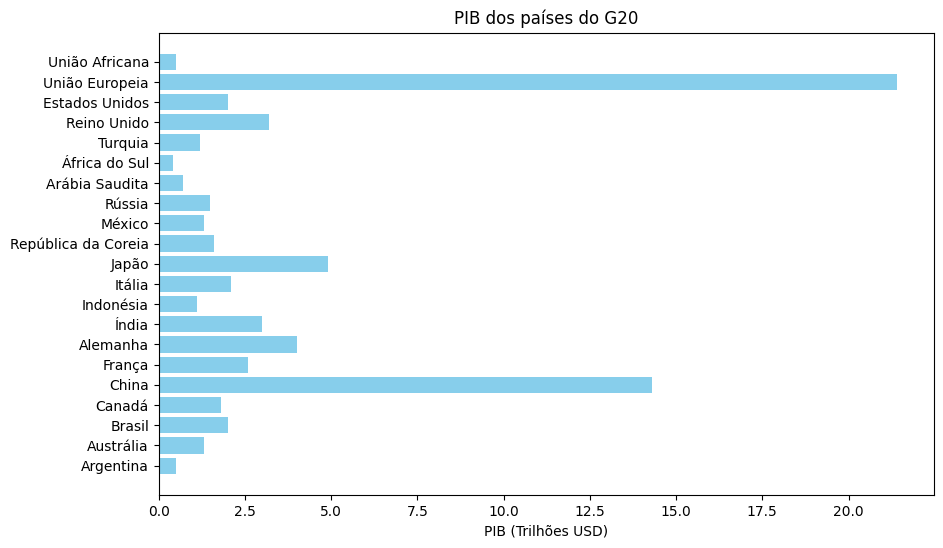

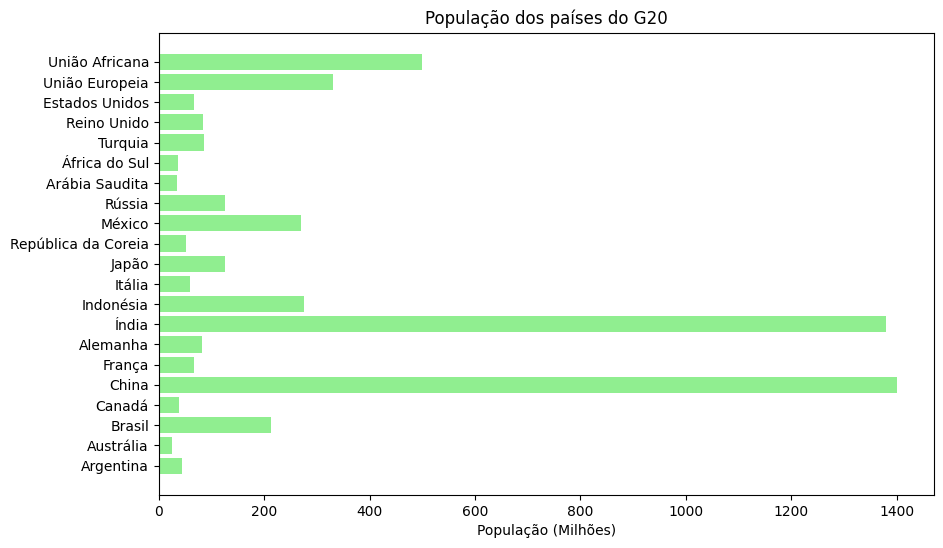

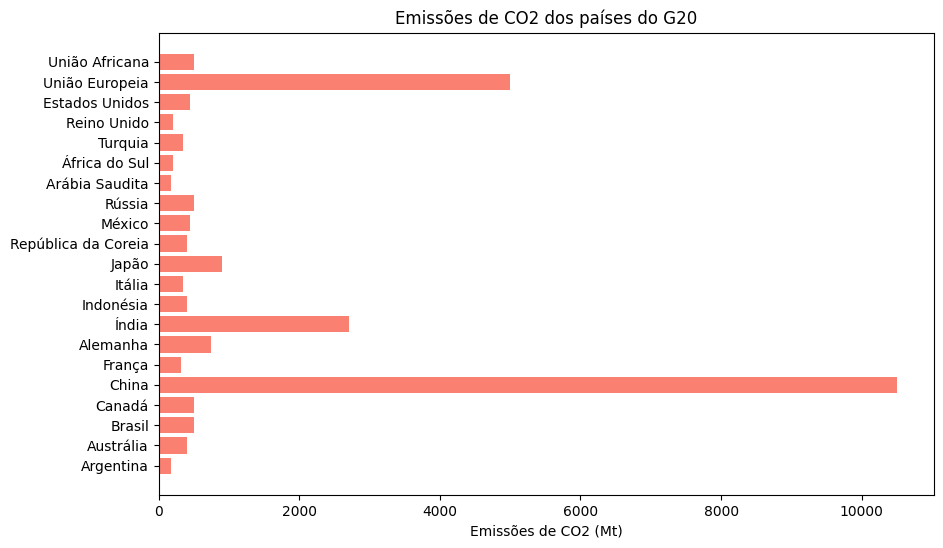

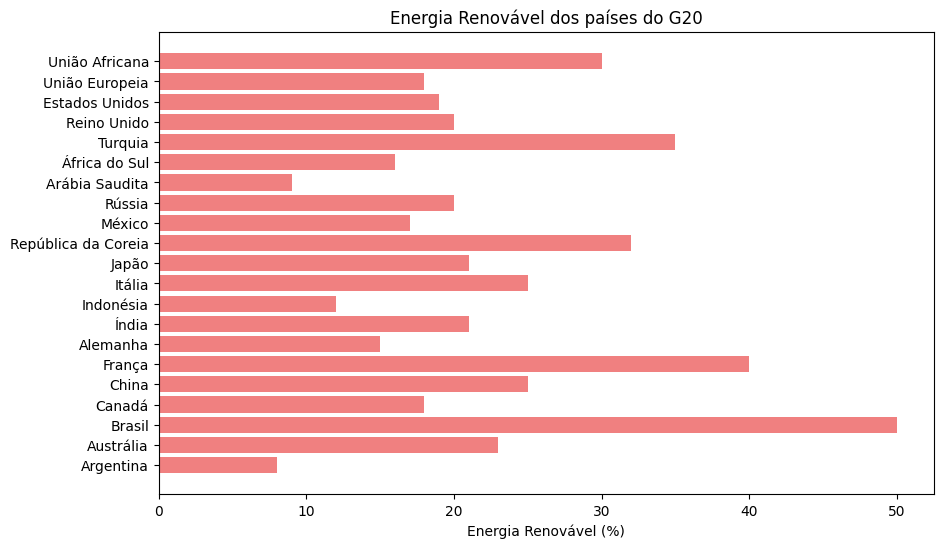

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Lista de países do G20
g20_members = [
    "Argentina", "Austrália", "Brasil", "Canadá", "China", "França", "Alemanha", "Índia",
    "Indonésia", "Itália", "Japão", "República da Coreia", "México", "Rússia", "Arábia Saudita",
    "África do Sul", "Turquia", "Reino Unido", "Estados Unidos", "União Europeia", "União Africana"
]

# Dados adicionais sobre os países do G20
g20_data = {
    "Membro G20": g20_members,
    "PIB (Trilhões USD)": [0.5, 1.3, 2.0, 1.8, 14.3, 2.6, 4.0, 3.0, 1.1, 2.1, 4.9, 1.6, 1.3, 1.5, 0.7, 0.4, 1.2, 3.2, 2.0, 21.4, 0.5],
    "População (Milhões)": [45, 26, 213, 38, 1400, 67, 83, 1380, 275, 60, 126, 51, 270, 126, 35, 37, 85, 84, 67, 331, 500],
    "Emissões CO2 (Mt)": [180, 400, 500, 500, 10500, 320, 750, 2700, 400, 350, 900, 400, 450, 500, 180, 200, 350, 200, 450, 5000, 500],
    "IDH (Índice de Desenvolvimento Humano)": [0.845, 0.948, 0.754, 0.922, 0.768, 0.901, 0.950, 0.619, 0.746, 0.870, 0.890, 0.803, 0.730, 0.778, 0.795, 0.855, 0.877, 0.888, 0.900, 0.920, 0.850],
    "Energia Renovável (%)": [8, 23, 50, 18, 25, 40, 15, 21, 12, 25, 21, 32, 17, 20, 9, 16, 35, 20, 19, 18, 30]
}

# Criando o DataFrame
df_g20 = pd.DataFrame(g20_data)

# Criando os gráficos

# Gráfico de PIB
plt.figure(figsize=(10,6))
plt.barh(df_g20["Membro G20"], df_g20["PIB (Trilhões USD)"], color='skyblue')
plt.xlabel('PIB (Trilhões USD)')
plt.title('PIB dos países do G20')
plt.show()

# Gráfico de População
plt.figure(figsize=(10,6))
plt.barh(df_g20["Membro G20"], df_g20["População (Milhões)"], color='lightgreen')
plt.xlabel('População (Milhões)')
plt.title('População dos países do G20')
plt.show()

# Gráfico de Emissões de CO2
plt.figure(figsize=(10,6))
plt.barh(df_g20["Membro G20"], df_g20["Emissões CO2 (Mt)"], color='salmon')
plt.xlabel('Emissões de CO2 (Mt)')
plt.title('Emissões de CO2 dos países do G20')
plt.show()

# Gráfico de Energia Renovável
plt.figure(figsize=(10,6))
plt.barh(df_g20["Membro G20"], df_g20["Energia Renovável (%)"], color='lightcoral')
plt.xlabel('Energia Renovável (%)')
plt.title('Energia Renovável dos países do G20')
plt.show()
